<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li></ul></li></ul></div>

# Decision Trees

## Decision Tree Classifier

I know it's probably cliché to use the iris dataset, but utilizing here to run through/review classifiers. :)

In [1]:
# Import packages 
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
iris = load_iris()
# Preview keys
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
# Preview the dataset description 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We can see the classes are evenly distributed. There are 4 features/predictors/attributes and 150 instances.

In [3]:
# Preview targets
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
# Preview features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Preview data 
print(iris.data[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
# Separate data into predictor & target variables
X = iris.data[:,2:]
y = iris.target

# Separate training & test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 24)

# Instantiate classifier
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 2)
# Fit classifier
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [7]:
# Create dot file of decision tree
export_graphviz(
    tree_clf, 
    out_file = 'iris_tree.dot', 
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

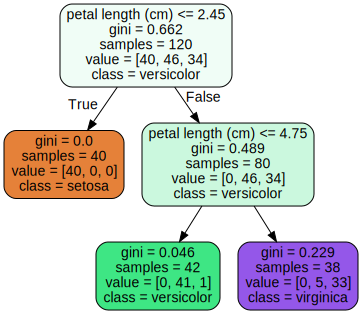

In [8]:
# View file
with open('iris_tree.dot') as f:
    dot_graph = f.read()
    
Source(dot_graph)

In [9]:
# Predict
y_pred = tree_clf.predict(X_test)


# View confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  3,  1],
       [ 0,  0, 16]])

In [10]:
# Mean accuracy
tree_clf.score(X_test,y_test).round(4)

0.9667

In [11]:
# Cross validation - 10 folds
scores = cross_val_score(tree_clf, X, y, cv=10)

# Mean 10-fold cross val
print(scores.mean().round(4))
# Std
print(scores.std().round(4))

0.9533
0.0521


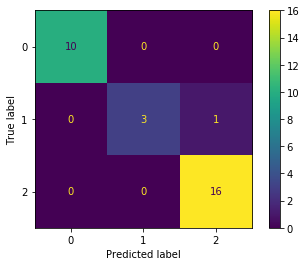

In [13]:
# Plot confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test)
plt.show()

Obviously this performed very well due to the dataset. :) 

In [25]:
# Probability of a flower w/petals 5cm long and 1.5cm wide
print(iris.target_names)
tree_clf.predict_proba([[5, 1.5]]).round(2)

['setosa' 'versicolor' 'virginica']


array([[0.  , 0.13, 0.87]])

So, there is an ~87% chance (probability) that this flower with 5cm x 1.5cm petals belongs to the species *verginica*.